In [1]:
import seaborn as sns
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from env import host, username, password
import prepare
import wrangle
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import explore
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the tips dataset
tips = sns.load_dataset('tips')

# Create the price_per_person column
tips['price_per_person'] = tips['total_bill'] / tips['size']

# Show the first 5 rows of the updated dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  price_per_person
0       16.99  1.01  Female     No  Sun  Dinner     2          8.495000
1       10.34  1.66    Male     No  Sun  Dinner     3          3.446667
2       21.01  3.50    Male     No  Sun  Dinner     3          7.003333
3       23.68  3.31    Male     No  Sun  Dinner     2         11.840000
4       24.59  3.61  Female     No  Sun  Dinner     4          6.147500


In the case of the tips dataset, some features that could potentially be important for predicting the tip amount are:

1. Total bill: customers may tip a higher percentage for larger bills.
2. Party size: larger parties may leave a smaller percentage tip than smaller parties.
3. Day of the week: tipping customs may vary depending on the day of the week (e.g. weekend vs weekday).
4. Time of day: tipping customs may vary depending on the time of day (e.g. lunch vs dinner).
5. Gender of the server: tipping customs may vary depending on the gender of the server.
6. Smoking section: customers in the smoking section may tip differently than those in the non-smoking section.
7. Alcohol consumption: customers who consume alcohol may tip differently than those who don't.
8. Customer rating: customers may tip more for excellent service and less for poor service.


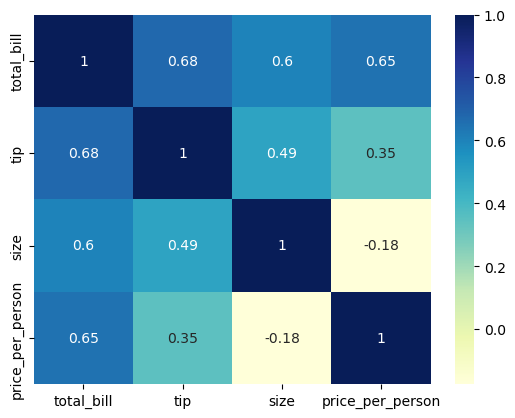

In [10]:
# Create a heatmap correlation using the seaborn library
corr = tips.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Show the heatmap
plt.show()

In [2]:
train, validate, test = wrangle.split_data(tips)

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 2 features using SelectKBest and f_regression
X = train.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
y = train['tip']
selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)

# Get the indices of the top 2 features
top_indices = selector.get_support(indices=True)

# Get the names of the top 2 features
top_features = X.columns[top_indices]

# Show the top 2 features
print(top_features)

Index(['total_bill', 'size'], dtype='object')


In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Separate the target variable and the input features
X = train.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
y = train['tip']

# Instantiate a linear regression model
model = LinearRegression()

# Instantiate an RFE object with 2 features to select
selector = RFE(model, n_features_to_select=2)

# Fit the RFE selector to the data
selector.fit(X, y)

# Get the indices of the top 2 features
top_indices = selector.get_support(indices=True)

# Get the names of the top 2 features
top_features = X.columns[top_indices]

# Show the top 2 features
print(top_features)


Index(['total_bill', 'price_per_person'], dtype='object')


Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

SelectKBest and Recursive Feature Elimination (RFE) use different criteria to select features, which may result in different answers for the top features. SelectKBest selects the k best features based on a statistical test, such as the chi-squared test or the F-test, which measures the dependence between each feature and the target variable. On the other hand, RFE selects features by recursively removing the least important feature and re-fitting the model until the desired number of features is reached. 

SelectKBest is a simpler and faster method that may be appropriate when you have a large number of features and want to quickly identify the most informative ones. However, it may not perform well when the relationship between the features and the target variable is nonlinear or complex. RFE, on the other hand, can handle nonlinear and complex relationships between features and the target variable, but it can be computationally expensive and may take longer to converge to the optimal solution.

As for whether the top features change when you change the number of features you are selecting, the answer is yes. When you increase the number of features you are selecting, the likelihood of finding different features increases. This is because additional features may have a stronger or weaker relationship with the target variable than the initial features, and the ranking of features may change as a result. Therefore, it is important to experiment with different numbers of features and compare the results to ensure that you are selecting the features that best fit your modeling goals.

In [5]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest(X, y, k):
    """
    Select the top k features from X based on univariate statistical tests.

    Parameters:
    - X: pandas DataFrame of shape (n_samples, n_features)
        The input features to select from.
    - y: pandas Series or array of shape (n_samples,)
        The target variable.
    - k: integer
        The number of top features to select.

    Returns:
    - list of strings
        The names of the top k features selected.
    """
    # Instantiate a SelectKBest object with f_regression as the score function
    selector = SelectKBest(score_func=f_regression, k=k)

    # Fit the selector to the data
    selector.fit(X, y)

    # Get the indices of the top k features
    top_indices = selector.get_support(indices=True)

    # Get the names of the top k features
    top_features = list(X.columns[top_indices])

    return top_features

In [6]:
# Separate the target variable and the input features
X = train.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
y = train['tip']

# Select the top 2 features using the select_kbest function
top_features = select_kbest(X, y, k=2)

# Print the top 2 features
print(top_features)

['total_bill', 'size']


In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression object
estimator = LinearRegression()

# Define a function to use RFE for feature selection
def rfe(X, y, k):
    # Instantiate a RFE object with the estimator and number of features to select
    selector = RFE(estimator)
    
    # Fit the selector to the data and select the top k features
    selector.fit(X, y)
    top_k_features = selector.ranking_[:k]
    
    return top_k_features

In [8]:
# Select the top 2 features using the rfe function
top_features = rfe(X, y, k=2)

# Print the top 2 features
print(top_features)

[1 3]


In [9]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the Swiss dataset from pydataset
from pydataset import data
df = data('swiss')

if 'Region' in df.columns:
    X = df.drop(['Fertility', 'Region'], axis=1)
else:
    X = df.drop(['Fertility'], axis=1)

# Split the data into X (features) and y (target)
y = df['Fertility']

# Use SelectKBest to find top 3 features
skb = SelectKBest(score_func=f_regression, k=3)
X_new = skb.fit_transform(X, y)
top3_skb = X.columns[skb.get_support()]

# Use Recursive Feature Elimination to find top 3 features
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=3)
rfe.fit(X, y)
top3_rfe = X.columns[rfe.support_]

print('Top 3 features using SelectKBest:', top3_skb)
print('Top 3 features using Recursive Feature Elimination:', top3_rfe)


Top 3 features using SelectKBest: Index(['Examination', 'Education', 'Catholic'], dtype='object')
Top 3 features using Recursive Feature Elimination: Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')
